# 05. Modeling with PCA
___


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

from sklearn.model_selection import GridSearchCV




___


Introduction


In this notebook, I will be building two types classification models. Using Logistic Regression and Decision Trees, we will see if we can correctly classify our target variable and predict the classes of new datapoints.
I will train each model with a portion of the dataset and then compare the outputs with my test set. 
I will follow the same steps as the previous notebook, but introducing PCA for dimensionality reduction.


___


In [3]:
heart22 = pd.read_csv('~/Desktop/capstone-project-Tasnimacj/data/cleaned_data/heart22_preprocessed.csv',index_col=0 )

In [4]:
heart22.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246013 entries, 0 to 246012
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Female                         246013 non-null  int64  
 1   GeneralHealth                  246013 non-null  int64  
 2   PhysicalHealthDays             246013 non-null  float64
 3   MentalHealthDays               246013 non-null  float64
 4   LastCheckupTime                246013 non-null  int64  
 5   PhysicalActivities             246013 non-null  int64  
 6   SleepHours                     246013 non-null  float64
 7   RemovedTeeth                   246013 non-null  int64  
 8   HadHeartAttack                 246013 non-null  int64  
 9   HadAngina                      246013 non-null  int64  
 10  HadStroke                      246013 non-null  int64  
 11  HadAsthma                      246013 non-null  int64  
 12  HadSkinCancer                  2460


 After loading in the data, we have to split our data into our feature columns and target variable. We do a train-test split to prevent our models from overfitting.

In [5]:
y = heart22['HadAngina'] # Target Variable
X = heart22.drop('HadAngina', axis=1) 

In [6]:
print('Shape of y:', y.shape)
print('Shape of X:', X.shape)

Shape of y: (246013,)
Shape of X: (246013, 41)


In [7]:
#1st split

X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.2, random_state=25, stratify=y)

print(f'The remainder set has {len(X_rem)} data points.')
print(f'The test set has {len(X_test)} data points.')

The remainder set has 196810 data points.
The test set has 49203 data points.


___

### 1 PCA


PCA stands for Principal Component Analysis. It combines features and creates new components to describe the directions of greatest variance. It aims to explain most of the data but also reduce the number of features needed.

In [8]:
ss = StandardScaler().fit(X_rem)
X_rem_ss = ss.transform(X_rem)
X_test_ss = ss.transform(X_test)

In [10]:
print(f"correlation: {np.corrcoef(X_rem_ss[:,0], X_rem_ss[:,1])[0,1]:0.2f}")

The two axis have correlation: 0.02


There is almost no correlation between my features, so this means that I would need all my feature columns to explain the data. 

We can fit and transform our scaled data to create our pca object, X_pca.

In [11]:
my_PCA = PCA()

X_pca = my_PCA.fit_transform(X_rem_ss)


In [12]:
X_pca.shape

(196810, 41)

In [15]:
ex_var_ratio = my_PCA.explained_variance_ratio_

ex_var_ratio

array([0.11132925, 0.0680004 , 0.05572923, 0.03943203, 0.03838521,
       0.03148202, 0.02830254, 0.02740439, 0.02669218, 0.02571383,
       0.02489283, 0.02428743, 0.02408577, 0.02370368, 0.02344469,
       0.02299635, 0.02259557, 0.02186955, 0.02116488, 0.02102949,
       0.02058346, 0.01995303, 0.019775  , 0.01961808, 0.0192491 ,
       0.01880456, 0.01856819, 0.01816608, 0.01763422, 0.01675282,
       0.01654482, 0.01580101, 0.0147906 , 0.01469905, 0.01348372,
       0.01308221, 0.01254683, 0.01108528, 0.00891798, 0.00722446,
       0.0001782 ])

Scree Plot

Using a scree plot, we can see the variance explained by each component.

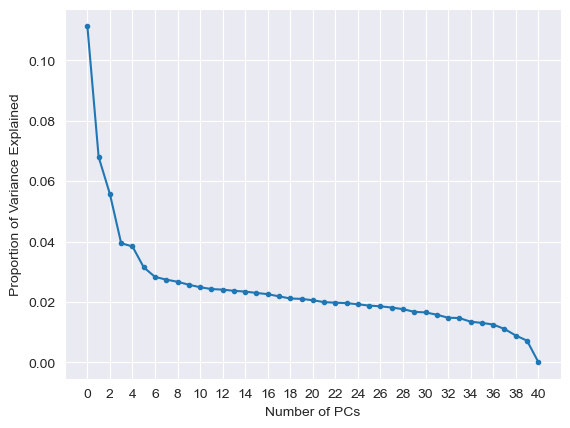

In [16]:
plt.figure()
sns.set_style('darkgrid')

plt.plot(range(0,41),ex_var_ratio,marker='.')

plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')

plt.xticks(range(0,41,2))


plt.show()

Looking at the plot, it would seem that we would need all the components to explain all the variance.

Threshold Explained Variance

Another graph we can plot is cumulative sum of variance against number of components.

In [17]:
cumulative_sum = np.cumsum(ex_var_ratio)

cumulative_sum

array([0.11132925, 0.17932965, 0.23505888, 0.27449091, 0.31287612,
       0.34435815, 0.37266068, 0.40006507, 0.42675725, 0.45247108,
       0.47736391, 0.50165134, 0.5257371 , 0.54944078, 0.57288547,
       0.59588182, 0.6184774 , 0.64034695, 0.66151183, 0.68254132,
       0.70312478, 0.72307782, 0.74285282, 0.76247089, 0.78171999,
       0.80052455, 0.81909274, 0.83725882, 0.85489304, 0.87164586,
       0.88819068, 0.90399169, 0.91878228, 0.93348133, 0.94696505,
       0.96004725, 0.97259409, 0.98367937, 0.99259735, 0.9998218 ,
       1.        ])

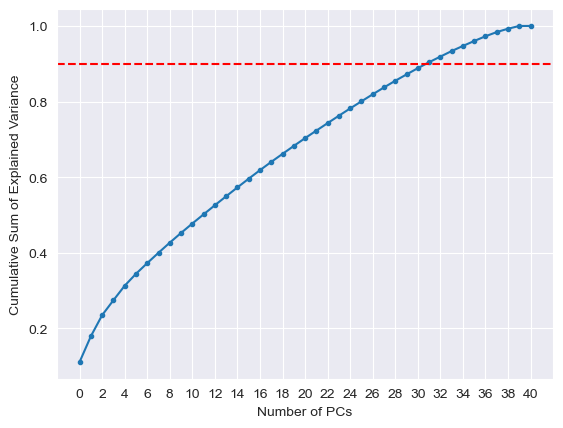

In [18]:

plt.figure()

plt.plot(range(0,41), cumulative_sum, marker='.')

plt.axhline(0.9, c='red', linestyle='--')

plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')

plt.xticks(range(0,41,2))



plt.show()

To explain 90% of explained variance, we would need 31 PCs. 

___

### 2 Tuning Logistic Regression

Pipeline

Using a pipeline, I want to find the best hyperparameters for my model. I set up a pipeline that contains a scaler, dimension reducer and a model of our choice. 

In [19]:
from tempfile import mkdtemp
cachedir = mkdtemp()

In [20]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("my_pca", PCA()),
                 ("model", LogisticRegression())], memory=cachedir)

Hyperparameter Optimisation

Setting up a parameter grid with what I would like to change in my model. I want to explore different c values and the model penalty. For now, I only want to scale my data using a standard scaler.

For our PCA, I want my model to have either 80%, 85% or 90% explained variance.

In [21]:

n_components = [0.8, 0.85, 0.9]
c_values = [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000]


log_reg_param = [

    {'scaler': [ StandardScaler()],
     'my_pca__n_components': n_components,
     'model': [LogisticRegression(solver='saga',random_state=1, n_jobs=-1, max_iter=10000)], 
     'model__C': c_values,
     'model__penalty': ['l1', 'l2'],
    }
]

GridSearch

In [22]:
grid = GridSearchCV(estimator=pipe,param_grid=log_reg_param, cv=5,verbose=1,refit=True)

In [23]:
fittedgrid_lr = grid.fit(X_rem,y_rem)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [24]:
fittedgrid_lr.best_params_

{'model': LogisticRegression(C=0.01, max_iter=10000, n_jobs=-1, penalty='l1',
                    random_state=1, solver='saga'),
 'model__C': 0.01,
 'model__penalty': 'l1',
 'my_pca__n_components': 0.85,
 'scaler': StandardScaler()}

GridSearch looks at different parameter settings across 5 cross folds on our Remainder set. It does this to find the best model settings whilst preventing data leakage and overfitting on our train set. The model works best by selecting components that explain 0.85 variance.
GridSearch has found that the best parameters for our Logistic Regression is having a C value of 0.01, which means we need a strong regularization strength. We need a L1 penalty to help set coefficients to 0.

Model Interpretation

In [25]:
fittedgrid_lr.best_estimator_.named_steps["my_pca"].explained_variance_ratio_

array([0.11132925, 0.0680004 , 0.05572923, 0.03943203, 0.03838521,
       0.03148202, 0.02830254, 0.02740439, 0.02669218, 0.02571383,
       0.02489283, 0.02428743, 0.02408577, 0.02370368, 0.02344469,
       0.02299635, 0.02259557, 0.02186955, 0.02116488, 0.02102949,
       0.02058346, 0.01995303, 0.019775  , 0.01961808, 0.0192491 ,
       0.01880456, 0.01856819, 0.01816608, 0.01763422])

We can see that each PC component only explains a very small amount of variance.

Model Evaluation

In [71]:
print(f"Best accuracy on the remainder set: {fittedgrid_lr.score(X_rem, y_rem)}")
print(f"Best accuracy on the test set: {fittedgrid_lr.score(X_test, y_test)}")

Best accuracy on the remainder set: 0.9447334993140593
Best accuracy on the test set: 0.9444139584984655


In [72]:
y_test_pred = fittedgrid_lr.predict(X_test)

conmat = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

print(f'Recall score: {recall_score(y_test, y_test_pred)*100:0.2f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred)*100:0.2f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred)*100:0.2f}%')

,predicted 0,predicted 1
true 0,45669,543
true 1,2192,799


Recall score: 26.71%
Precision score: 59.54%
F1 score: 36.88%


In [73]:
best_logreg_recall = round(recall_score(y_test, y_test_pred)*100, 2)
best_logreg_precision = round(precision_score(y_test, y_test_pred)*100, 2)
best_logreg_f1 = round(f1_score(y_test, y_test_pred)*100, 2)
best_logreg_accu = round(fittedgrid_lr.score(X_test_ss, y_test)*100,2)

Our decided best logistic regression model has not improved after introducing PCA. It produces similar results and ROC to our previous gridsearch logistic regression model. 

ROC

In [39]:
y_proba = fittedgrid_lr.best_estimator_.predict_proba(X_test)[:,1]

# precision and recall for default (0.5) cut-off
y_threshold = np.where(y_proba > 0.5, 1, 0)

print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}",'\n')


# higher cut-off (0.8)
y_threshold = np.where(y_proba > 0.8, 1, 0)

print("Threshold of 0.8:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")

Threshold of 0.5:
Precision score: 0.5953800298062594
Recall score: 0.2671347375459712 

Threshold of 0.8:
Precision score: 0.7534883720930232
Recall score: 0.05416248746238716


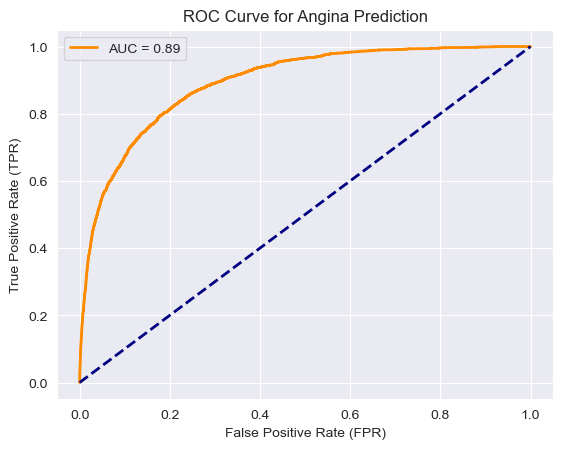

Area under curve (AUC):0.8927998904819133



In [40]:
from sklearn.metrics import roc_curve, roc_auc_score # template block of code

fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fprs, tprs, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Angina Prediction')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC):{roc_auc}')
print()


## Code block sourced from Brainstation Model Evaluation notebook


___

### 3 Tuning Decision Tree

Pipeline

Setting up the pipeline for another classification model, this time I will use Decision Tree Classifier.

In [41]:
pipe = Pipeline([("scaler", StandardScaler()),
                 ("my_pca", PCA()),
                 ("dt_model", DecisionTreeClassifier())], memory=cachedir)

Hyperparameter Optimisation

For the parameter grid, this time I want to see if scaling data would make a change in modeling. I still want to check for same PCs and explore different options for the trees max_depth and min_samples_leaf.

In [42]:

dt_param  = {"scaler":[StandardScaler(), None],
            "my_pca__n_components":n_components,
            "dt_model__max_depth": [None, 2, 4, 6, 8,10],
            "dt_model__min_samples_leaf": [2, 5, 10] }

In [31]:
# pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'my_pca', 'dt_model', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'my_pca__copy', 'my_pca__iterated_power', 'my_pca__n_components', 'my_pca__random_state', 'my_pca__svd_solver', 'my_pca__tol', 'my_pca__whiten', 'dt_model__ccp_alpha', 'dt_model__class_weight', 'dt_model__criterion', 'dt_model__max_depth', 'dt_model__max_features', 'dt_model__max_leaf_nodes', 'dt_model__min_impurity_decrease', 'dt_model__min_impurity_split', 'dt_model__min_samples_leaf', 'dt_model__min_samples_split', 'dt_model__min_weight_fraction_leaf', 'dt_model__random_state', 'dt_model__splitter'])

GridSearch

In [43]:
grid = GridSearchCV(estimator=pipe,param_grid=dt_param, cv=5,verbose=1,refit=True)

In [44]:
fittedgrid_dt = grid.fit(X_rem,y_rem)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [46]:
fittedgrid_dt.best_params_

{'dt_model__max_depth': 6,
 'dt_model__min_samples_leaf': 5,
 'my_pca__n_components': 0.9,
 'scaler': StandardScaler()}

The best optimization for our decision tree would be using a standard scaler, having a max_depth of 6 and 5 min_samples_leaf. Scaling my data beforehand seems to be a crucial step for modeling. 
Here for our decision tree, we would need to explain 90% of the variance in our data, which means we would need about 31 features.

Model Interpretation

In [47]:

fittedgrid_dt.best_estimator_.named_steps["my_pca"].explained_variance_ratio_

array([0.11132925, 0.0680004 , 0.05572923, 0.03943203, 0.03838521,
       0.03148202, 0.02830254, 0.02740439, 0.02669218, 0.02571383,
       0.02489283, 0.02428743, 0.02408577, 0.02370368, 0.02344469,
       0.02299635, 0.02259557, 0.02186955, 0.02116488, 0.02102949,
       0.02058346, 0.01995303, 0.019775  , 0.01961808, 0.0192491 ,
       0.01880456, 0.01856819, 0.01816608, 0.01763422, 0.01675282,
       0.01654482, 0.01580101])

Model Evaluation

In [49]:
print(f"Best accuracy on the remainder set: {fittedgrid_dt.score(X_rem, y_rem)}")
print(f"Best accuracy on the test set: {fittedgrid_dt.score(X_test, y_test)}")

Best accuracy on the remainder set: 0.9445150144809715
Best accuracy on the test set: 0.9424222100278439


In [50]:

y_test_pred = fittedgrid_dt.predict(X_test)

conmat = pd.DataFrame(
    data = confusion_matrix(y_test, y_test_pred),
    index = ['true 0', 'true 1'],
    columns = ['predicted 0', 'predicted 1']
)
display(conmat)

print(f'Recall score: {recall_score(y_test, y_test_pred)*100:0.2f}%')
print(f'Precision score: {precision_score(y_test, y_test_pred)*100:0.2f}%')
print(f'F1 score: {f1_score(y_test, y_test_pred)*100:0.2f}%')

,predicted 0,predicted 1
true 0,45432,780
true 1,2053,938


Recall score: 31.36%
Precision score: 54.60%
F1 score: 39.84%


In [51]:
best_dt_recall = round(recall_score(y_test, y_test_pred)*100, 2)
best_dt_precision = round(precision_score(y_test, y_test_pred)*100, 2)
best_dt_f1 = round(f1_score(y_test, y_test_pred)*100, 2)
best_dt_accu = round(fittedgrid_dt.score(X_test_ss, y_test)*100,2)

Our recall score has improved slightly compared to with no PCA. However, the precision has dropped by 5%.

ROC

In [55]:
y_proba = fittedgrid_dt.best_estimator_.predict_proba(X_test)[:,1]

# precision and recall for default (0.5) cut-off
y_threshold = np.where(y_proba > 0.5, 1, 0)

print("Threshold of 0.5:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}",'\n')


# higher cut-off (0.75)
y_threshold = np.where(y_proba > 0.75, 1, 0)

print("Threshold of 0.75:")
print(f"Precision score: {precision_score(y_test, y_threshold)}")
print(f"Recall score: {recall_score(y_test, y_threshold)}")

Threshold of 0.5:
Precision score: 0.5459837019790454
Recall score: 0.3136074891340689 

Threshold of 0.75:
Precision score: 0.6
Recall score: 0.02106318956870612


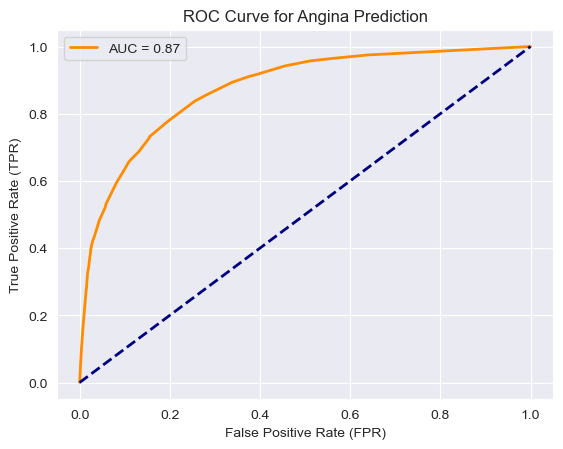

Area under curve (AUC):0.8745992840172614



In [56]:
from sklearn.metrics import roc_curve, roc_auc_score # template block of code

fprs, tprs, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure()
plt.plot(fprs, tprs, color='darkorange',
         lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Angina Prediction')
plt.legend(loc="best")
plt.show()

print(f'Area under curve (AUC):{roc_auc}')
print()


## Code block sourced from Brainstation Model Evaluation notebook

Our AUC has actually improved a little as well.

___


Conclusion

In [74]:
data = {'F1 score' :[best_logreg_f1,best_dt_f1],
       'Recall score':[best_logreg_recall,best_dt_recall], 
       'Precision score':[best_logreg_precision,best_dt_precision],
       'Accuracy':[best_logreg_accu,best_dt_accu]}


scores = pd.DataFrame(
    data = data,
    index = ['Best LogReg (PCA)', 'Best DT (PCA)'],
    columns = ['F1 score','Recall score', 'Precision score', 'Accuracy']
)

Here is a table that compares the F1, Recall, Precision and Test Accuracy for each model.

In [61]:
scores

,F1 score,Recall score,Precision score,Accuracy
Best LogReg (PCA),36.88,26.71,59.54,93.76
Best DT (PCA),39.84,31.36,54.60,92.36


After trying PCA, I found that it has not helped improve my models as I thought it would.
 It seems I would need most, if not all, of my features to explain my data, so PCA is an unnecessary step.

In [59]:
scores.to_csv('~/Desktop/capstone-project-Tasnimacj/data/cleaned_data/scores_pca.csv')
#save our score dataframe